### Project Title
RiskScope: Global Disaster Prediction

## Problem Statement 
The project uses a dataset and a simple prediction model to figure out which places in the world are most at risk from natural disasters like floods or storms. It looks at factors like how exposed a place is, how poor or unprepared people are, and how risks have changed over time to predict a disaster risk score (WRI)

### Description 
The dataset includes the World Risk Index (WRI) and factors like Exposure (disaster likelihood), Susceptibility (poverty, weak infrastructure), Lack of Coping/Adaptive Capabilities, and Year for regions worldwide, aiming to identify disaster-prone areas. Using a simple regression model, we predict WRI to pinpoint high-risk regions and key risk drivers. The model and clear charts help governments and communities plan better defenses, like stronger shelters or emergency training, to reduce disaster impacts. Categorical columns (WRI Category, etc.) validate predictions for actionable insights.

In [ ]:
## Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from yellowbrick.regressor import PredictionError  # Optional visualizer
import shap  # Optional explainer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#import the dataset 
df = pd.read_csv("/kaggle/input/global-disaster-risk-index-time-series-dataset/world_risk_index.csv")
df.head(10)

In [ ]:
#exploring and Understanding the dataset

df.info()

In [ ]:
#statistical description of the dataset
df.describe()

In [ ]:
#check for all the null values
df.isnull().sum()

### EDA

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
## redundant

df.info()

In [ ]:
## selecting only the numerical columns
numerical_cols =  list(df.select_dtypes(include=['int64','float64']).columns)
numerical_cols

In [ ]:
categorical_cols =  list(df.select_dtypes(exclude=['int64','float64']).columns)
categorical_cols

In [ ]:
df = df.replace([np.inf,-np.inf],np.nan)

#### Univariate Analysis

In [ ]:
## KDE plot for all the numerical columns 

for col in numerical_cols:
    plt.figure(figsize=(5,5))
    sns.kdeplot(data=df[col])
    plt.title(f"KDE plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()

In [ ]:
## Analysing categorical variables

df['Region'].nunique()

In [ ]:
## Outlier analysis
for col in numerical_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df[col])
    plt.title(f"Box plot for {col}")
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
## Bivariate analysis 


## 1. Correlation Matrix

corr_matrix = df[numerical_cols].corr()

sns.heatmap(data = corr_matrix, annot = True,fmt = '.2f',cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [ ]:
## 2.Pairplot
import itertools

pairs = list(itertools.combinations(numerical_cols,2))

for x,y in pairs:
    plt.figure(figsize= (4,4))
    sns.scatterplot(x=df[x],y=df[y],alpha=0.5)
    plt.title(f"Scatter plot of {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

In [ ]:
## Feature transformation 

df[numerical_cols].describe()

In [ ]:
## Feature and target selection

numerical_cols = numerical_cols[:len(numerical_cols)]
numerical_cols

In [ ]:
#Feature Selection 

X = df[numerical_cols].drop('WRI',axis=1)
y = df['WRI']

In [ ]:
#Feature shape comparison

X.shape
y.shape


#splitting into test and training data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape

In [29]:
##imputing values 
from sklearn.impute import SimpleImputer

# Replace NaN with mean (you can also use median or most_frequent)
imputer = SimpleImputer(strategy="mean")

# Fit only on training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [30]:
# Training a Linear Regression Model 


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluation
print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("RMSE:", mean_squared_error(y_test, y_pred_lin, squared=False))
print("-" * 40)

Linear Regression Results:
R2 Score: -15.890732923853832
MSE: 594.279154601167
RMSE: 24.377841467225252
----------------------------------------


In [32]:
corr_matrix = np.corrcoef(X_train.T)  # transpose so each feature is a row
print(corr_matrix)


[[ 1.          0.11700288  0.0778409   0.15514442  0.0950817   0.04208587]
 [ 0.11700288  1.          0.93521074  0.92850732  0.94441713 -0.06010102]
 [ 0.0778409   0.93521074  1.          0.77889822  0.83833615 -0.04035871]
 [ 0.15514442  0.92850732  0.77889822  1.          0.82638424  0.06584984]
 [ 0.0950817   0.94441713  0.83833615  0.82638424  1.         -0.21064438]
 [ 0.04208587 -0.06010102 -0.04035871  0.06584984 -0.21064438  1.        ]]


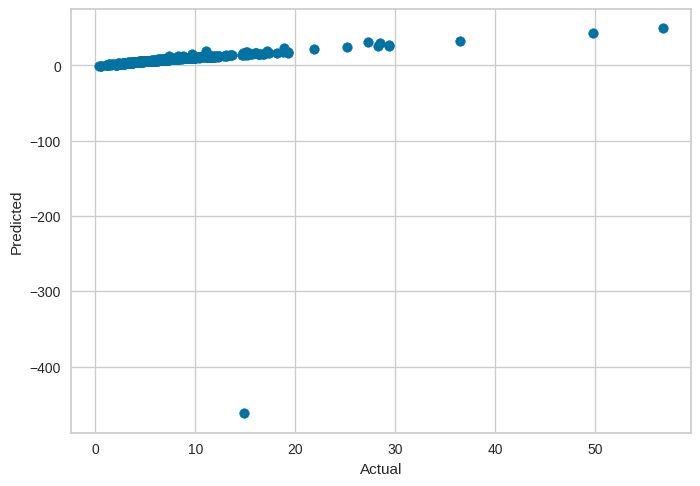

In [33]:
#Plotting actual vs predicted values 

plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [34]:
#Decision Tree Regrressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)  # random_state ensures reproducibility

# Train the model
dt_reg.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_reg.predict(X_test)

# Evaluation
print("Decision Tree Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("-" * 40)


Decision Tree Regression Results:
R2 Score: 0.9331565931982045
MSE: 2.351801041666667
RMSE: 1.5335582941859978
----------------------------------------


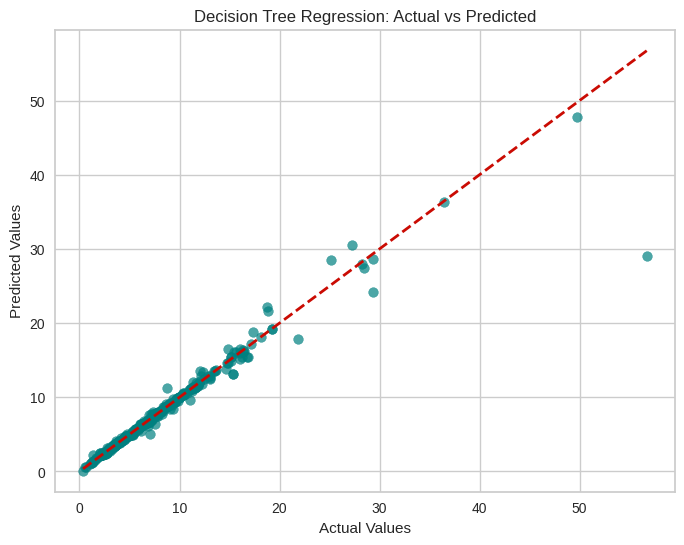

In [35]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()


In [37]:
# Random Foresg regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees

# Train the model
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
print("Random Forest Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("-" * 40)


Random Forest Regression Results:
R2 Score: 0.9744447141396104
MSE: 0.8991305318229136
RMSE: 0.9482249373555378
----------------------------------------


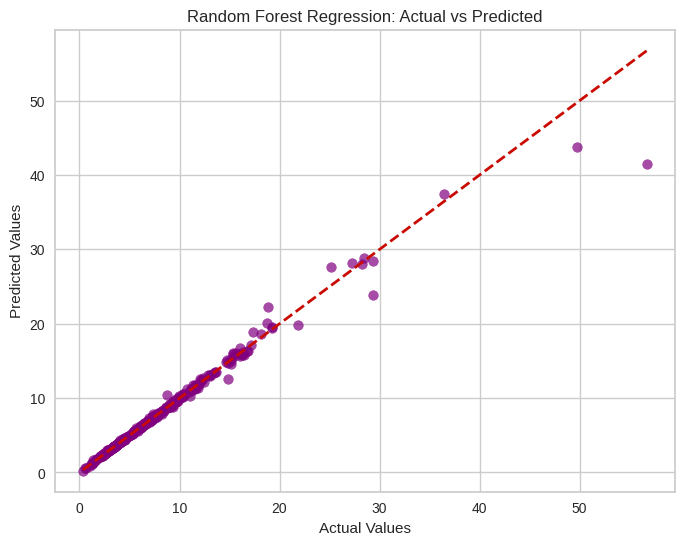

In [38]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()


In [39]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_reg, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [40]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(y_pred_loaded[:5])  # show first 5 predictions


[6.7208 7.4747 6.2265 2.756  5.8271]
